# Importando base de dados

In [231]:
import pandas as pd

In [232]:
dados = pd.read_csv('dados/tips.csv')

In [233]:
dados.sample(5)

,total_bill,tip,dessert,day,time,size
3314,41.973920,3.465622,No,Thur,Lunch,5
488,16.751828,1.087380,No,Sun,Dinner,2
918,21.769488,2.914024,Yes,Sun,Dinner,3
1790,10.339940,1.940477,No,Thur,Lunch,1
2560,12.813782,2.086794,No,Thur,Lunch,2


# Tradução

In [234]:
dados.columns

Index(['total_bill', 'tip', 'dessert', 'day', 'time', 'size'], dtype='object')

In [235]:
renomear = {
    'total_bill' : 'valor_da_conta', 
    'tip' : 'gorjeta', 
    'dessert' : 'sobremesa', 
    'day' : 'dia_da_semana', 
    'time' : 'hora_do_dia', 
    'size' : 'total_de_pessoas'
}
gorjetas = dados.rename(columns = renomear)

In [236]:
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,No,Sun,Dinner,2


In [237]:
gorjetas.sobremesa.unique()

array(['No', 'Yes'], dtype=object)

In [238]:
sim_nao = {
    'No' : 'Não', 
    'Yes' : 'Sim'
}

In [239]:
gorjetas.sobremesa.map(sim_nao)

0       Não
1       Não
2       Não
3       Não
4       Não
       ... 
3411    Não
3412    Sim
3413    Sim
3414    Não
3415    Não
Name: sobremesa, Length: 3416, dtype: object

In [240]:
gorjetas.sobremesa = gorjetas.sobremesa.map(sim_nao)

In [241]:
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Sun,Dinner,2


In [242]:
gorjetas.dia_da_semana.unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [243]:
dias = {'Sun' : 'Domingo', 'Sat' : 'Sábado', 'Thur' : 'Quinta', 'Fri' : 'Sexta'}

In [244]:
gorjetas.dia_da_semana = gorjetas.dia_da_semana.map(dias)

In [245]:
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Dinner,2


In [246]:
gorjetas.hora_do_dia.unique()

array(['Dinner', 'Lunch'], dtype=object)

In [247]:
hora = {'Dinner' : 'Jantar', 'Lunch': 'Almoço'}
gorjetas.hora_do_dia = gorjetas.hora_do_dia.map(hora)

In [248]:
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Jantar,2


# Importacão do Seaborn

In [249]:
!pip install seaborn

In [250]:
import seaborn as sns

In [251]:
!pip show seaborn

Name: seaborn
Version: 0.10.1
Summary: seaborn: statistical data visualization
Home-page: https://seaborn.pydata.org
Author: Michael Waskom
Author-email: mwaskom@nyu.edu
License: BSD (3-clause)
Location: f:\anaconda3\lib\site-packages
Requires: matplotlib, scipy, pandas, numpy
Required-by: 


# Análise 1 - Valor da conta e gorjeta

In [252]:
gorjetas.columns

Index(['valor_da_conta', 'gorjeta', 'sobremesa', 'dia_da_semana',
       'hora_do_dia', 'total_de_pessoas'],
      dtype='object')

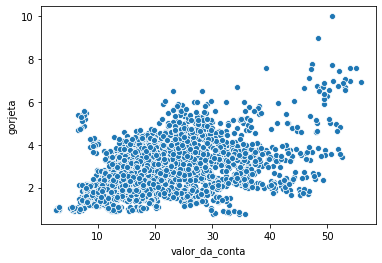

In [253]:
valor_gorjeta = sns.scatterplot(x= 'valor_da_conta', y = 'gorjeta', data = gorjetas)

**Visualmente, o valor da gorjeta aumenta conforme o valor da conta**

In [254]:
print(f'A base de dados contem {gorjetas.shape[0]} registros')
print('Registros não nulos:')
gorjetas.count()

A base de dados contem 3416 registros
Registros não nulos:


valor_da_conta      3416
gorjeta             3416
sobremesa           3416
dia_da_semana       3416
hora_do_dia         3416
total_de_pessoas    3416
dtype: int64

## Criação o campo porcentagem

In [255]:
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Jantar,2


In [256]:
gorjetas['porcentagem'] = (gorjetas.gorjeta / gorjetas.valor_da_conta).round(2)

In [257]:
gorjetas.head(3)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17


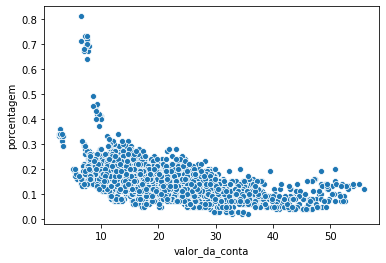

In [258]:
porcentagem_conta = sns.scatterplot(x = 'valor_da_conta', y = 'porcentagem', data = gorjetas)

**Visualmente, o valor da conta nao é proporcional ao valor da gorjeta**

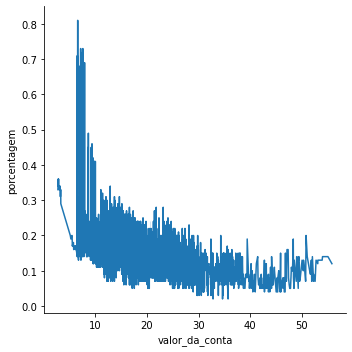

In [259]:
porcentagem_conta_linha = sns.relplot(x = 'valor_da_conta', y = 'porcentagem', kind='line', data = gorjetas)

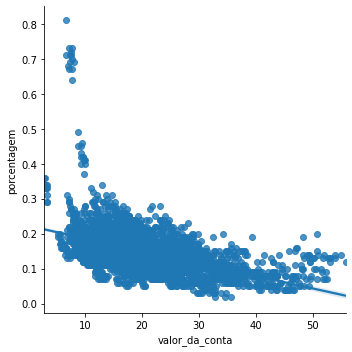

In [260]:
sns.lmplot(x='valor_da_conta', y = 'porcentagem', data=gorjetas)

In [261]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


# Análise 2 - Sobremesa

In [262]:
gorjetas[gorjetas.sobremesa == 'Sim'].describe()

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
count,1302.000000,1302.000000,1302.000000,1302.000000
mean,20.800076,2.710137,2.408602,0.153425
std,9.901358,1.162280,0.806690,0.088961
min,2.799644,0.766203,1.000000,0.020000
25%,13.495501,1.911661,2.000000,0.090000
50%,17.917059,2.434354,2.000000,0.150000
75%,26.807493,3.326298,3.000000,0.190000
max,55.804318,10.000000,5.000000,0.810000


In [263]:
gorjetas[gorjetas.sobremesa == 'Não'].describe()

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
count,2114.000000,2114.000000,2114.000000,2114.000000
mean,19.223436,2.711837,2.668874,0.150033
std,8.316030,1.024271,1.014848,0.044248
min,6.533329,0.910509,1.000000,0.040000
25%,13.281977,1.931135,2.000000,0.120000
50%,17.736923,2.608222,2.000000,0.150000
75%,22.749482,3.284578,3.000000,0.180000
max,53.091371,9.000000,6.000000,0.330000


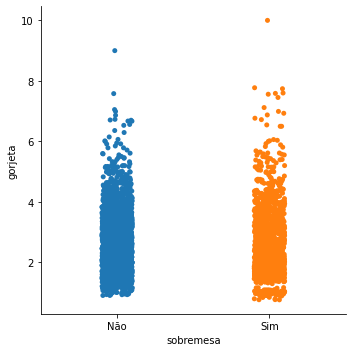

In [264]:
sns.catplot(x = 'sobremesa', y = 'gorjeta', data = gorjetas)

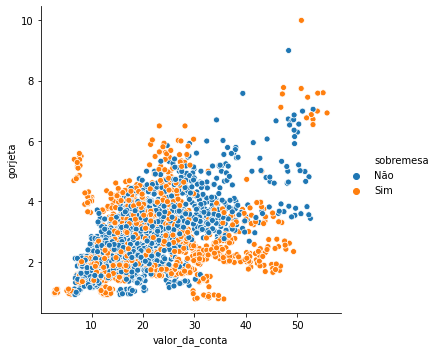

In [265]:
sns.relplot(x = 'valor_da_conta', y = 'gorjeta', hue = 'sobremesa', data = gorjetas)

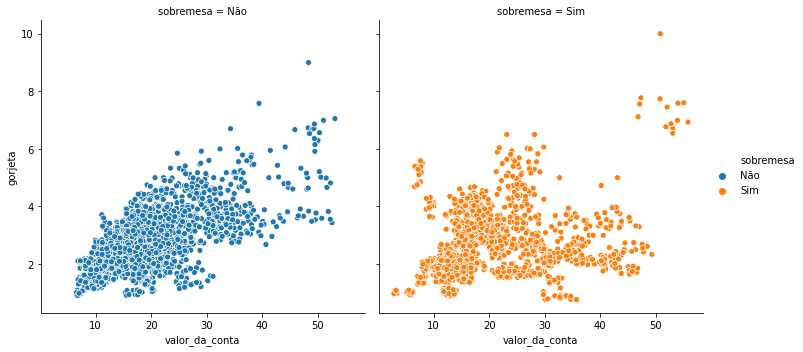

In [266]:
sns.relplot(x = 'valor_da_conta', y = 'gorjeta', hue = 'sobremesa', col='sobremesa', data = gorjetas)

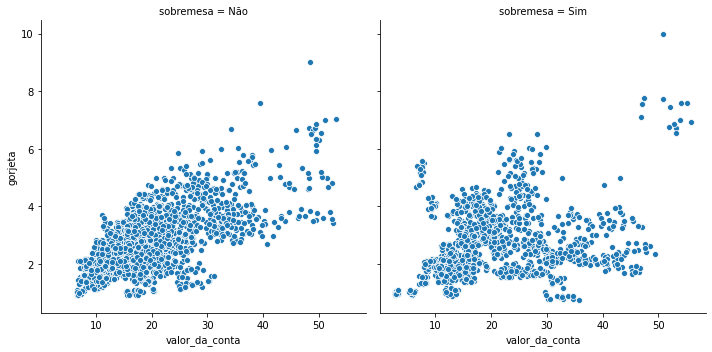

In [267]:
sns.relplot(x = 'valor_da_conta', y = 'gorjeta', col='sobremesa', data = gorjetas)

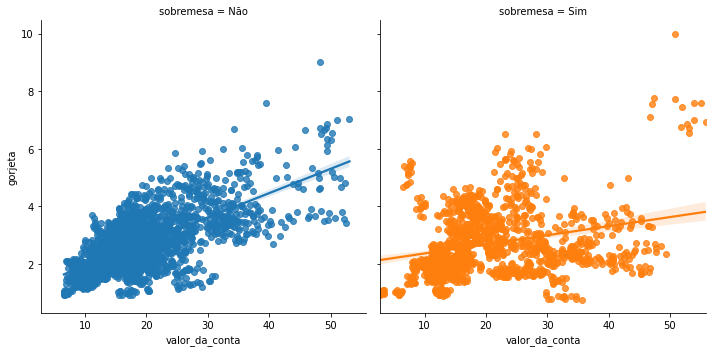

In [268]:
sns.lmplot(x='valor_da_conta', y='gorjeta', col='sobremesa', hue='sobremesa', data=gorjetas)

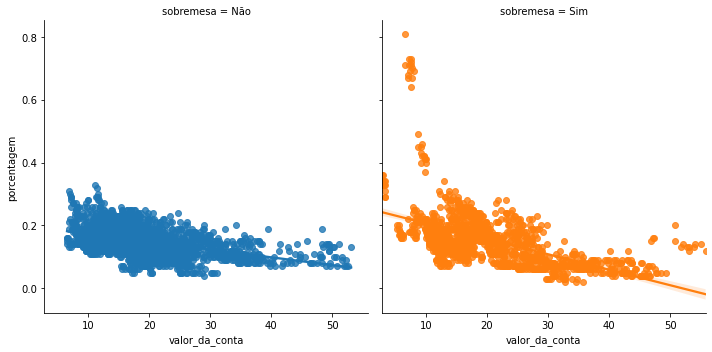

In [269]:
sns.lmplot(x='valor_da_conta', y='porcentagem', col='sobremesa', hue='sobremesa', data=gorjetas)

**Visualmente, exite uma diferença no valor da gorjeta daquele que pediram e não pediram sobremesa**

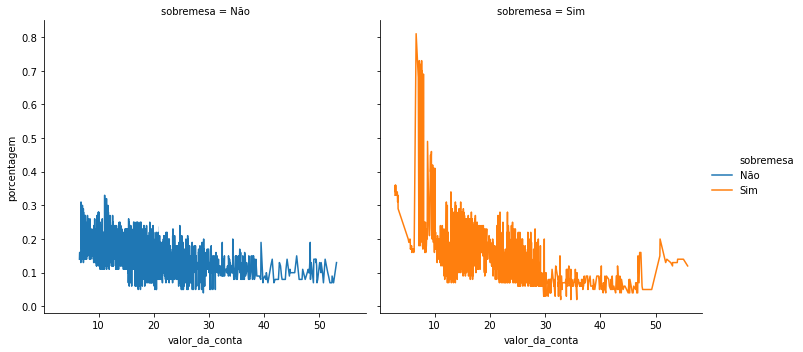

In [270]:
sns.relplot(x='valor_da_conta', y='porcentagem', col='sobremesa', hue='sobremesa', kind='line', data=gorjetas)

## Teste de hipótese

**H<sup>null</sup>**
>**A distribuição da taxa da gorjeta é a mesma nos dois grupos**

**H<sup>alt</sup>**
>**A distribuição da taxa da gorjeta não é a mesma nos dois grupos**

In [271]:
from scipy.stats import ranksums

In [272]:
sobremesa = gorjetas.query("sobremesa == 'Sim'").porcentagem

In [273]:
sem_sobremesa = gorjetas.query("sobremesa == 'Não'").porcentagem

In [274]:
r = ranksums(sobremesa, sem_sobremesa)

In [275]:
print(f'O valor do p-value é {r.pvalue}')

O valor do p-value é 0.033144013617673405


**H<sup>null</sup>**
>**A distribuição da taxa da gorjeta é a mesma nos dois grupos**

# Análise 3 - Dias da semana

In [276]:
gorjetas.dia_da_semana.unique()

array(['Domingo', 'Sábado', 'Quinta', 'Sexta'], dtype=object)

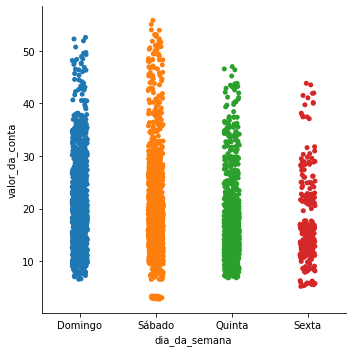

In [277]:
sns.catplot(x='dia_da_semana', y='valor_da_conta', data=gorjetas)

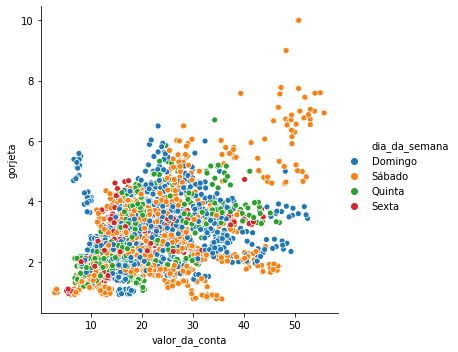

In [278]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='dia_da_semana', data=gorjetas)

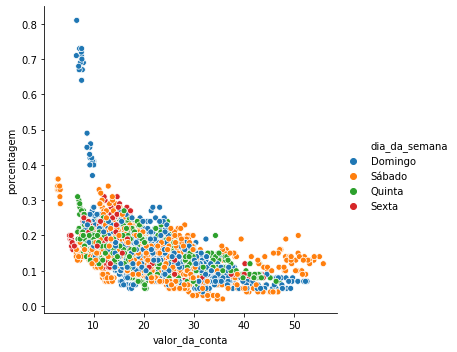

In [279]:
sns.relplot(x='valor_da_conta', y='porcentagem', hue='dia_da_semana', data=gorjetas)

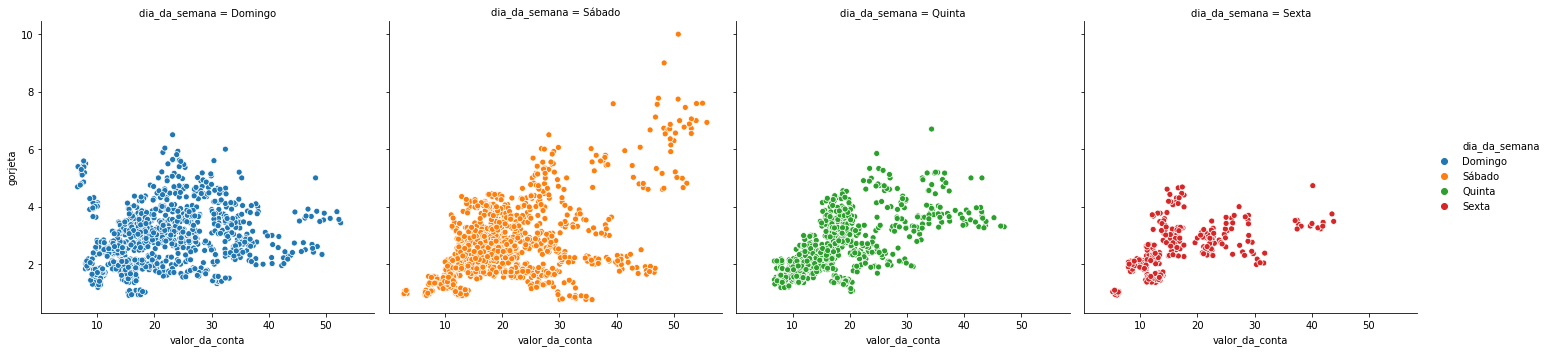

In [280]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='dia_da_semana', col='dia_da_semana', data=gorjetas)

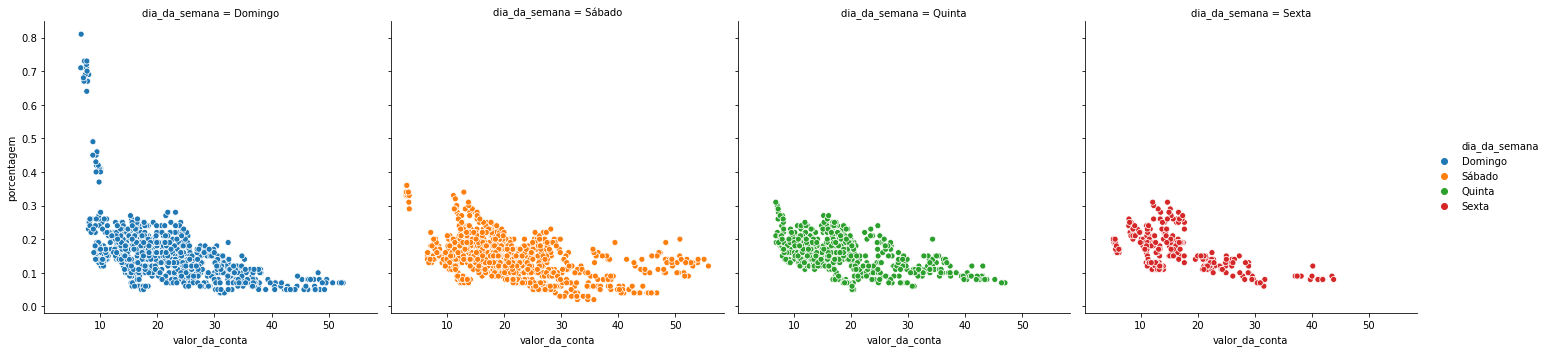

In [281]:
sns.relplot(x='valor_da_conta', y='porcentagem', hue='dia_da_semana', col='dia_da_semana', data=gorjetas)

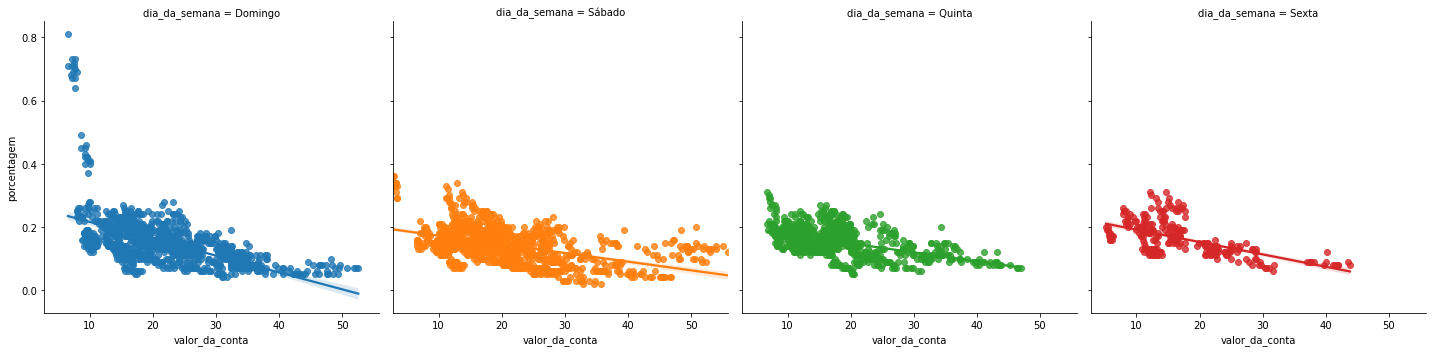

In [282]:
sns.lmplot(x='valor_da_conta', y='porcentagem', hue='dia_da_semana', col='dia_da_semana', data=gorjetas)

In [283]:
media_geral_gorjetas = gorjetas.gorjeta.mean()

In [284]:
print(f'A média gera das gorjetas é de {media_geral_gorjetas}')

A média gera das gorjetas é de 2.7111892140916103


In [285]:
media_gorjetas_por_dia_da_semana = gorjetas.groupby(['dia_da_semana']).mean()[['valor_da_conta', 'gorjeta', 'porcentagem']]

In [286]:
media_gorjetas_por_dia_da_semana['Frequencia'] = gorjetas.dia_da_semana.value_counts()
media_gorjetas_por_dia_da_semana

,valor_da_conta,gorjeta,porcentagem,Frequencia
dia_da_semana,,,,
Domingo,21.439133,2.902079,0.154953,1064
Quinta,17.724088,2.556177,0.154090,868
Sexta,17.215616,2.549960,0.163158,266
Sábado,20.480249,2.690114,0.143604,1218


## Teste de hipótese

**H<sup>null</sup>**
>**A distribuição do valor da conta é igual no sabado e no domingo**

**H<sup>alt</sup>**
>**A distribuição do valor da conta não é igual no sabado e no domingo**


In [287]:
valor_conta_domingo = gorjetas.query("dia_da_semana == 'Domingo'" ).valor_da_conta

In [288]:
valor_conta_sabado = gorjetas.query("dia_da_semana == 'Sábado'" ).valor_da_conta

In [289]:
r2 = ranksums(valor_conta_domingo, valor_conta_sabado)
print(f'O valor do p-value é {r2.pvalue}')

O valor do p-value é 0.0004435935681441821


**H<sup>null</sup>**
>**A distribuição do valor da conta é igual no sabado e no domingo**

# Analise 4 - Hora do dia

In [290]:
gorjetas.head(5)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


In [291]:
gorjetas.hora_do_dia.unique()

array(['Jantar', 'Almoço'], dtype=object)

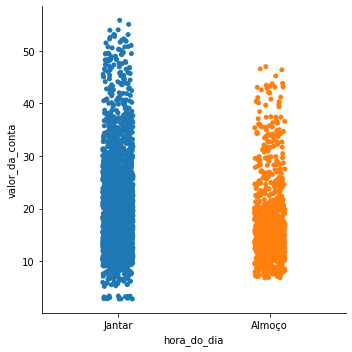

In [292]:
sns.catplot(x='hora_do_dia', y='valor_da_conta', data=gorjetas)

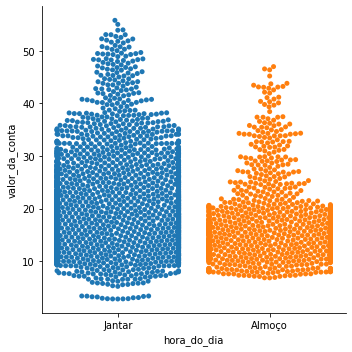

In [293]:
sns.catplot(x='hora_do_dia', y='valor_da_conta',kind='swarm', data=gorjetas)

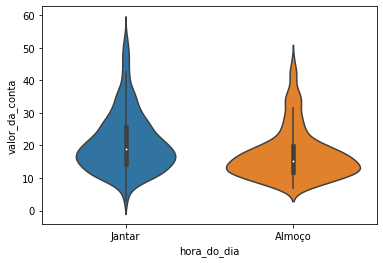

In [294]:
sns.violinplot(x='hora_do_dia', y='valor_da_conta', data=gorjetas)

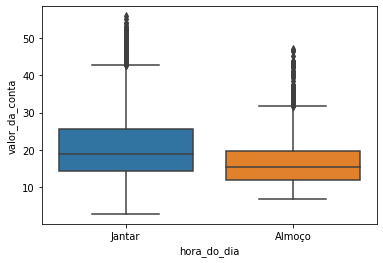

In [295]:
sns.boxplot(x='hora_do_dia', y='valor_da_conta', data=gorjetas)

In [296]:
almoco = gorjetas.query("hora_do_dia == 'Almoço'").valor_da_conta

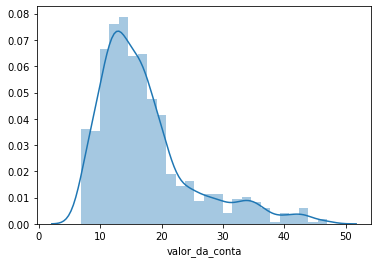

In [297]:
sns.distplot(almoco)

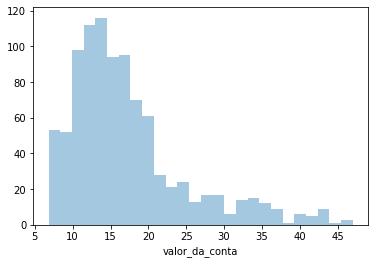

In [298]:
sns.distplot(almoco, kde=False)

In [299]:
jantar = gorjetas.query("hora_do_dia == 'Jantar'").valor_da_conta

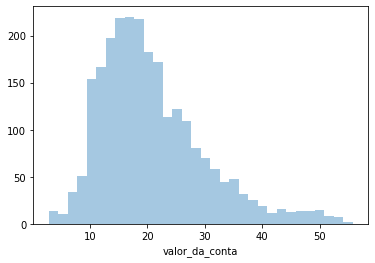

In [300]:
sns.distplot(jantar, kde=False)

In [301]:
gorjetas.groupby(['hora_do_dia']).mean()[['valor_da_conta', 'gorjeta', 'porcentagem']]

,valor_da_conta,gorjeta,porcentagem
hora_do_dia,,,
Almoço,17.213913,2.534495,0.157668
Jantar,20.832954,2.779458,0.148876


## Teste de Hipótese

**H<sup>null</sup>**
>**A distribuição do valor da conta é igual no jantar e no almoço**

**H<sup>alt</sup>**
>**A distribuição do valor da conta não é igual no jantar e no almoço**


In [302]:
r3 = ranksums(jantar, almoco)

In [303]:
print(f'O valor do p-value é {r3.pvalue}')

O valor do p-value é 5.169201062207143e-34


**H<sup>alt</sup>**
>**A distribuição do valor da conta não é igual no jantar e no almoço**

## Teste de hipótese 2

**H<sup>null</sup>**
>**A distribuição da taxa da gorjeta é igual no jantar e no almoço**

**H<sup>alt</sup>**
>**A distribuição da taxa da gorjeta não é igual no jantar e no almoço**


In [304]:
porcentagem_almoco = gorjetas.query("hora_do_dia == 'Almoço'").porcentagem

In [305]:
r4 = ranksums(porcentagem_almoco, porcentagem_jantar)
print(f'O valor do p-value é {r4.pvalue}')

O valor do p-value é 0.7604550346261612


In [306]:
porcentagem_jantar = gorjetas.query("hora_do_dia == 'Jantar'").porcentagem

**H<sup>null</sup>**
>**A distribuição da taxa da gorjeta é igual no jantar e no almoço**